###### <center> Mushroom Classification using KNN </center>
###### <center> Safe to eat or deadly poison? </center>

###### Data Set Information:

Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

<table border=1 cellpadding=6>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">8124</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Life</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
		<td><p class="normal">Categorical</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
		<td><p class="normal">22</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
		<td><p class="normal">1987-04-27</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">Yes</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">555036</p></td>
	</tr>
</table>

###### Attribute Information:

(classes: edible=e, poisonous=p)
 
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<b>Objectives:</b>
1. Perform the EDA on the dataset<br>
   1.1 Visualize the data on features which easily make sense (such as cap-shape & color, odor, habitat, etc.)<br>
   1.2 Visulize which mushrooms are edible & poisonous - does data suggest which feature of the mushroom help  identify its edibility?<br>
   1.3 Analyze the correlations between the features<br>
2. Train a classification model (e.g. KNN, LogisticsRegression) to predict the class of the mushroom (edible, poisonous)<br>
3. Test the model & analyze the results<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yuvrajpandya/ScikitLearn/master/Datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


class is a target/response variable & the rest of the features are independent variables. All the features & labels in the dataset are categorical. 

In [3]:
# quick check to see how balanced the dataset is
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

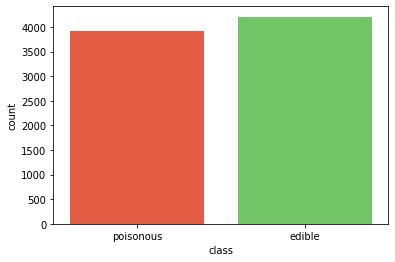

In [4]:
# distribution of the labels
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="class", data=df, palette=['#fd4b2a','#65d556'])
ax.set_xticklabels(['poisonous', 'edible']);

###### the labels are fairly distributed between poisonous and edible mushrooms.

In [5]:
# checking for missing data
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

No missing data found

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Analyze the edible & poisonous mushrooms based on different mushroom properties such as the shape, color, odor, etc.

In [7]:
# function to prepare bars for any feature to analyze its distribution across edible and poisonous classes
# returns a sorted dataframe with <feature> and count columns
def preparebars(feature, labels):
    # feature = 'cap-shape'
    # labels = {'b':'bell', 'f':'flat', 'k':'knobbed', 's':'sunken', 'x':'convex', 'c':'conical'}

    df_feature = df.groupby(by=['class', feature])['cap-surface'].count().reset_index().rename(columns={'cap-surface':'count'})

    edible_bars = df_feature.loc[df_feature['class']=='e',[feature,'count']].reset_index(drop=True) # dropping index is imp as later we are appending missing cat using .loc method
    poisonous_bars = df_feature.loc[df_feature['class']=='p',[feature,'count']].reset_index(drop=True)
    
    # append missing category's count as 0
    unique_cat = df[feature].unique()
    for cat in unique_cat:
        if cat not in edible_bars[feature].values:
            edible_bars.loc[edible_bars.shape[0]] = [cat, 0]
            
        if cat not in poisonous_bars[feature].values:
            poisonous_bars.loc[poisonous_bars.shape[0]] = [cat,0]
    
    # replace the mnemonics with the full name of the categories of the feature
    for key,val in labels.items():
        edible_bars.replace(to_replace=key, value=val, inplace=True)
        poisonous_bars.replace(to_replace=key, value=val, inplace=True)
    
    # IMPORTANT: the order of the records will not be the same in both dataframes, hence, first sort in desc the edible df and select poisonous df based on the edible df's records ignoring the index
    edible_bars = edible_bars.sort_values(by=['count'], ascending=False, inplace=False).reset_index(drop=True)
    return edible_bars, \
           poisonous_bars.iloc[pd.Index(poisonous_bars[feature]).get_indexer(edible_bars[feature].values)]

In [8]:
def autolabel(bars, axes):
    for bar in bars:
        height = bar.get_height()
        axes.text(bar.get_x() + bar.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=9)

<b>Edible and Poisonous mushrooms based on cap shape</b><br><br>
Observations:
1. Most of the mushrooms found to have convex & flat cap shape and those could be edible as well poisonous, no clear distinction there<br>
2. Bell cap shaped are more likely to be edible<br>
3. Knowbbed cap shaped are more likely to be poisonous<br>
4. While there is a small number of Sunken cap shape mushrooms - all are edible

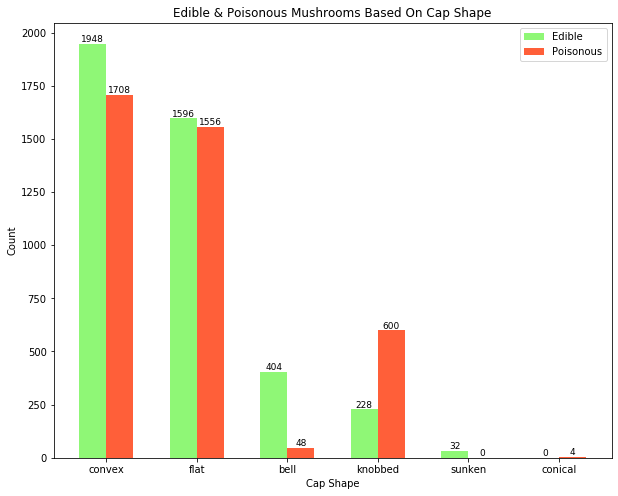

In [9]:
# shape
edible_shape, poisonous_shape = preparebars('cap-shape', {'b':'bell', 'f':'flat', 'k':'knobbed', 's':'sunken', 'x':'convex', 'c':'conical'})

# plot cap-shape and edible/poisonous mushroom
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Edible & Poisonous Mushrooms Based On Cap Shape')
width = 0.3
ed_indexes = [x+1 for x in edible_shape.index]
po_indexes = [x+width for x in ed_indexes]

labels = edible_shape['cap-shape']

# edible mushrooms having different cap-shape
edible_bars = ax.bar(ed_indexes, edible_shape['count'], width, color='#8ff776')

# poisonous mushrooms having different cap-shape
poisonous_bars = ax.bar(po_indexes, poisonous_shape['count'], width, color='#ff5f39')

# set x & y axis ticks & labels
ax.set_xticks([x+width/2 for x in ed_indexes])
ax.set_xticklabels(labels)
ax.set_xlabel('Cap Shape')
ax.set_ylabel('Count')

# set the label for each bar
autolabel(edible_bars, ax)
autolabel(poisonous_bars, ax)

ax.legend(['Edible', 'Poisonous']);

<b>Edible and Poisonous mushrooms based on cap color</b><br><br>
Observations: <br>
1. Most edible & poisonous mushrooms have brown & gray color caps, and there are more edible mushrooms than poisonous<br>
2. White color mushrooms are more likely to be edible<br>
3. Red & Yellow color mushrooms are more likely to be poisonous<br>

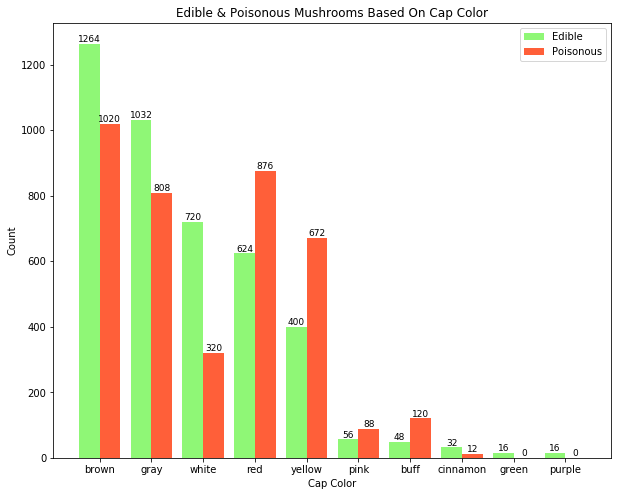

In [10]:
# color
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
edible_color, poisonous_color = preparebars('cap-color', {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'})
poisonous_color
# plot cap-color and edible/poisonous mushroom
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Edible & Poisonous Mushrooms Based On Cap Color')
width = 0.4
ed_indexes = [x+1 for x in edible_color.index]
po_indexes = [x+width for x in ed_indexes]

labels = edible_color['cap-color']

# edible mushrooms having different cap-color
edible_bars = ax.bar(ed_indexes, edible_color['count'], width, color='#8ff776')

# poisonous mushrooms having different cap-color
poisonous_bars = ax.bar(po_indexes, poisonous_color['count'], width, color='#ff5f39')

# set x & y axis ticks & labels
ax.set_xticks([x+width/2 for x in ed_indexes])
ax.set_xticklabels(labels)
ax.set_xlabel('Cap Color')
ax.set_ylabel('Count')

ax.legend(['Edible', 'Poisonous'])

# label each bar to shpw the count
autolabel(edible_bars, ax)
autolabel(poisonous_bars, ax);

<b>Edible and Poisonous mushrooms based on Odor:</b><br>
Observations:<br>
1. Only those mushrooms having no smell, almond, or anise smell are edible & the rest of the mushrooms are poisonous<br>
2. Among the edible mushrooms, most have no smells & a fraction of no smell mushrooms are poisonous i.e. a mushroom with no smell can be poisonous too!<br>
3. Among the poisonous mushrooms, most have foul smell. Also, all foul smell mushrooms are poisonous.<br>

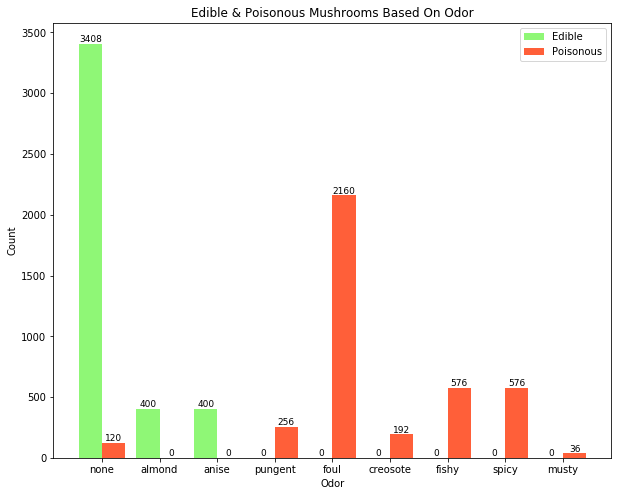

In [13]:
# odor
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
edible_odor, poisonous_odor = preparebars('odor', {'a':'almond', 'l':'anise', 'c':'creosote', 'y': 'fishy', 'f':'foul','m':'musty', 'n':'none', 'p':'pungent', 's':'spicy'})

# plot odor and edible/poisonous mushroom
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Edible & Poisonous Mushrooms Based On Odor')
width = 0.4
ed_indexes = [x+1 for x in edible_odor.index]
po_indexes = [x+width for x in ed_indexes]

labels = edible_odor['odor']

# edible mushrooms having different cap-color
edible_bars = ax.bar(ed_indexes, edible_odor['count'], width, color='#8ff776')

# poisonous mushrooms having different cap-color
poisonous_bars = ax.bar(po_indexes, poisonous_odor['count'], width, color='#ff5f39')

# set x & y axis ticks & labels
ax.set_xticks([x+width/2 for x in ed_indexes])
ax.set_xticklabels(labels)
ax.set_xlabel('Odor')
ax.set_ylabel('Count')

ax.legend(['Edible', 'Poisonous'])

# label each bar to show the count
autolabel(edible_bars, ax)
autolabel(poisonous_bars, ax);